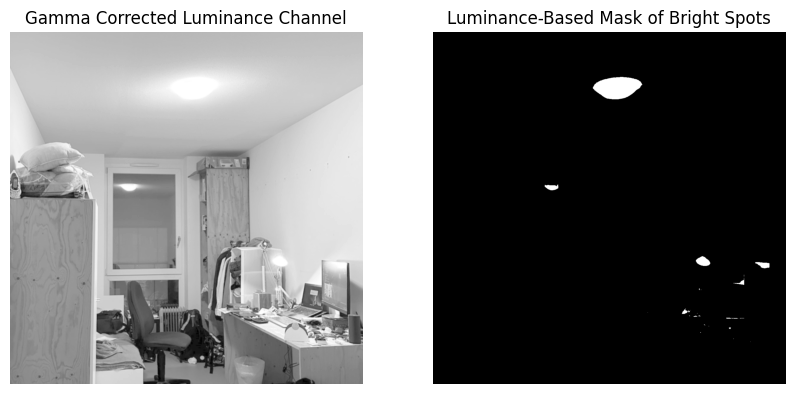

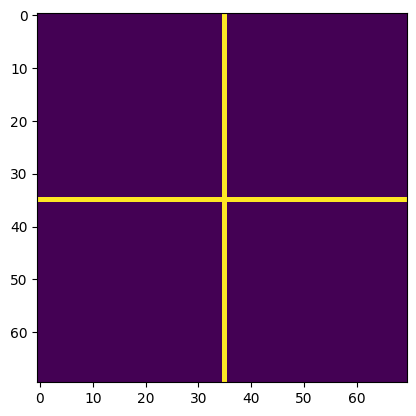

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load the original image
input_image_path = 'ex2_clean.jpeg'
original_image = cv2.imread(input_image_path)

# Convert to grayscale to find bright spots
gray_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)

threshold_value = 250

# Apply gamma correction to enhance bright spots
gamma = 0.45
corrected_image = np.power(gray_image / 255.0, gamma) * 255.0
corrected_image = corrected_image.astype(np.uint8)

corrected_image = cv2.GaussianBlur(corrected_image,(15,15),0)
# Threshold the image to get the bright spots
_, bright_spots = cv2.threshold(corrected_image, threshold_value, 255, cv2.THRESH_BINARY)

# Create a cross-shaped kernel for convolution
cross_size = 70
cross_kernel = np.zeros((cross_size, cross_size), dtype=np.uint8)
cv2.line(cross_kernel, (cross_size//2, 0), (cross_size//2, cross_size), 1, 1)
cv2.line(cross_kernel, (0, cross_size//2), (cross_size, cross_size//2), 1, 1)

# Convert the original image to YCbCr color space
ycbcr_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2YCrCb)

# Extract the Y component (luminance)
luminance_channel = ycbcr_image[:, :, 0]

# Apply gamma correction to enhance luminance details
gamma_corrected_luminance = np.power(luminance_channel / 255.0, gamma) * 255.0
gamma_corrected_luminance = gamma_corrected_luminance.astype(np.uint8)

gamma_corrected_luminance = cv2.GaussianBlur(gamma_corrected_luminance,(5,5),0)
# Threshold the luminance channel to get the luminance-based bright spots
_, luminance_based_bright_spots = cv2.threshold(gamma_corrected_luminance, threshold_value, 255, cv2.THRESH_BINARY)

luminance_spot_locations = np.argwhere(luminance_based_bright_spots > 0)
# Plot the luminance channel and the luminance-based mask of bright spots
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Gamma Corrected Luminance Channel')
plt.imshow(gamma_corrected_luminance, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Luminance-Based Mask of Bright Spots')
plt.imshow(luminance_based_bright_spots, cmap='gray')
plt.axis('off')

plt.show()


plt.imshow(cross_kernel)

### Apply the kernels

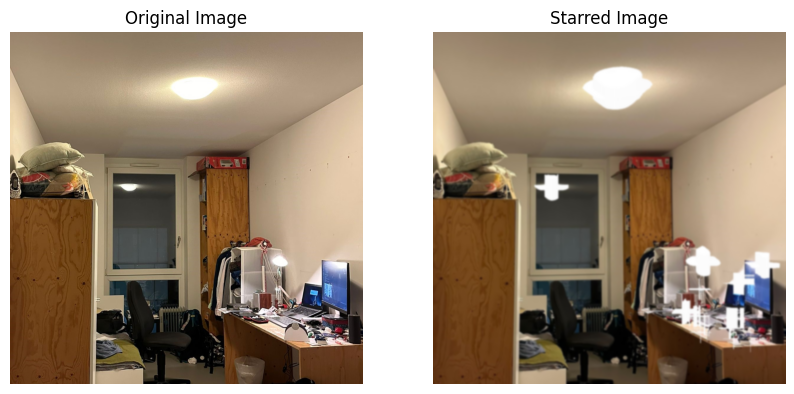

In [2]:
# Create an output image to draw the stars
output_image = original_image.copy()


# Draw the crosses on the bright spots
for (y, x) in luminance_spot_locations:
    intensity = corrected_image[y, x] / 255.0
    color = gamma_corrected_luminance[y, x]
    for i in range(-cross_size//2, cross_size//2 + 1):
        if 0 <= y + i < output_image.shape[0]:
            output_image[y + i, x] = color
        if 0 <= x + i < output_image.shape[1]:
            output_image[y, x + i] = color


blurred_output_image = cv2.GaussianBlur(output_image,(15,15),0)
blurred_original = cv2.GaussianBlur(original_image,(15,15),0)
# Save and display the output image
output_image_path = 'Starred_output.jpg'
cv2.imwrite(output_image_path, blurred_output_image)

# Display the original and output images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.subplot(1, 2, 2)
plt.title('Starred Image')
plt.imshow(cv2.cvtColor(blurred_output_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.savefig('Comparison_script')
plt.show()

### Comparison between original image and when the lens is used:

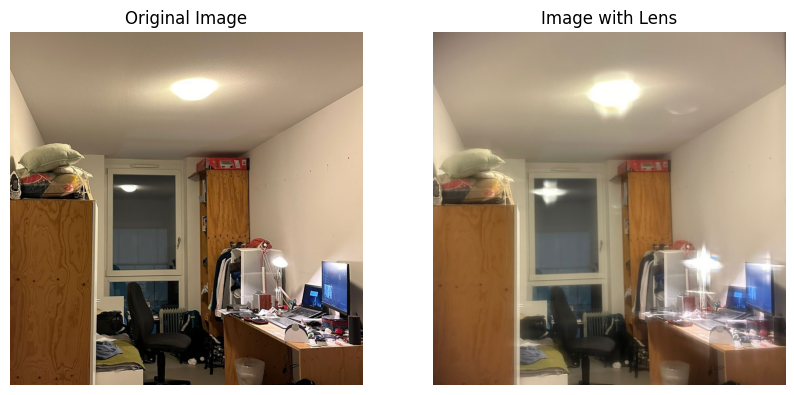

In [3]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load the original image
input_image_path = 'ex2_clean.jpeg'
original_image = cv2.imread(input_image_path)

desired_image_path = 'ex2_star.jpeg'
desired_image = cv2.imread(desired_image_path)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.subplot(1, 2, 2)
plt.title('Image with Lens')
plt.imshow(cv2.cvtColor(desired_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.savefig('comparison_with_lens')
plt.show()